In [1]:
# SDG 3: Good Health and Well-being
# Goal: Analyzing and predicting Maternal Mortality Ratio trends using Linear Regression

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [4]:
# Upload dataset
from google.colab import files
uploaded = files.upload()


Saving API_SH.STA.MMRT_DS2_en_csv_v2_656.csv to API_SH.STA.MMRT_DS2_en_csv_v2_656.csv


In [6]:
# Loading the dataset and displaying the first few rows
df_raw = pd.read_csv('API_SH.STA.MMRT_DS2_en_csv_v2_656.csv', skiprows=4)
df_raw.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Maternal mortality ratio (modeled estimate, pe...",SH.STA.MMRT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Maternal mortality ratio (modeled estimate, pe...",SH.STA.MMRT,NaN,NaN,NaN,NaN,NaN,NaN,...,376.0,354.0,327.0,308.0,290.0,312.0,269.0,268.0,NaN,NaN
2,Afghanistan,AFG,"Maternal mortality ratio (modeled estimate, pe...",SH.STA.MMRT,NaN,NaN,NaN,NaN,NaN,NaN,...,702.0,659.0,629.0,601.0,634.0,660.0,551.0,521.0,NaN,NaN
3,Africa Western and Central,AFW,"Maternal mortality ratio (modeled estimate, pe...",SH.STA.MMRT,NaN,NaN,NaN,NaN,NaN,NaN,...,799.0,782.0,757.0,744.0,720.0,716.0,674.0,650.0,NaN,NaN
4,Angola,AGO,"Maternal mortality ratio (modeled estimate, pe...",SH.STA.MMRT,NaN,NaN,NaN,NaN,NaN,NaN,...,236.0,220.0,208.0,202.0,195.0,211.0,185.0,183.0,NaN,NaN


In [7]:
# Selecting data for Kenya, India and Germany from 2000 to 2020 and cleaning it for analysis
countries = ['Kenya', 'India', 'Germany']
df = df_raw[df_raw['Country Name'].isin(countries)]
df = df.loc[:, ['Country Name'] + [str(year) for year in range(2000, 2021)]]
df = df.set_index('Country Name').T
df = df.dropna()
df.head()


Country Name,Germany,India,Kenya
2000,7.0,362.0,206.0
2001,6.0,349.0,188.0
2002,6.0,330.0,182.0
2003,6.0,313.0,177.0
2004,6.0,296.0,177.0


In [10]:
import pandas as pd

# Load and skip metadata rows
df_raw = pd.read_csv('API_SH.STA.MMRT_DS2_en_csv_v2_656.csv', skiprows=4)

# Keep only relevant countries
countries = ['Kenya', 'India', 'Germany']
df_filtered = df_raw[df_raw['Country Name'].isin(countries)]

# Keep only Year columns
df_years = df_filtered.loc[:, ['Country Name'] + [str(y) for y in range(2000, 2021)]]

# Reshape the DataFrame
df_melted = df_years.melt(id_vars='Country Name', var_name='Year', value_name='Mortality Rate')

# Pivot to get countries as columns
df = df_melted.pivot(index='Year', columns='Country Name', values='Mortality Rate').reset_index()

# Convert Year to numeric
df['Year'] = df['Year'].astype(int)

df.head()


Country Name,Year,Germany,India,Kenya
0,2000,7.0,362.0,206.0
1,2001,6.0,349.0,188.0
2,2002,6.0,330.0,182.0
3,2003,6.0,313.0,177.0
4,2004,6.0,296.0,177.0


In [11]:
# Preparing the data for each country by splitting it into training and testing sets
def prepare_country_data(country):
    X = df[['Year']]
    y = df[country]
    return train_test_split(X, y, test_size=0.2, random_state=42)

X_train_K, X_test_K, y_train_K, y_test_K = prepare_country_data('Kenya')
X_train_I, X_test_I, y_train_I, y_test_I = prepare_country_data('India')
X_train_G, X_test_G, y_train_G, y_test_G = prepare_country_data('Germany')


Evaluation for Kenya:
MAE: 8.210648548486734
RMSE: 9.717522377227505
R² Score: -0.5036662603808488



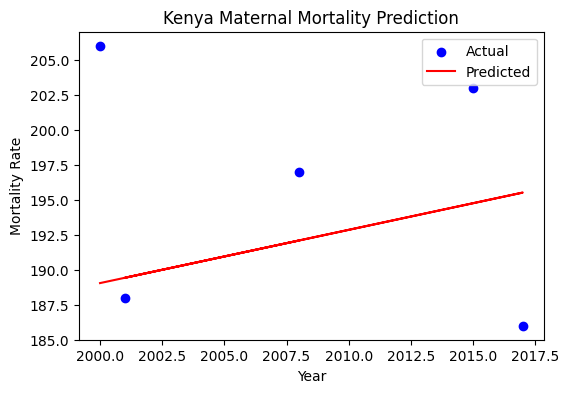

Evaluation for India:
MAE: 13.512612723903294
RMSE: 16.345918460420513
R² Score: 0.975880588646557



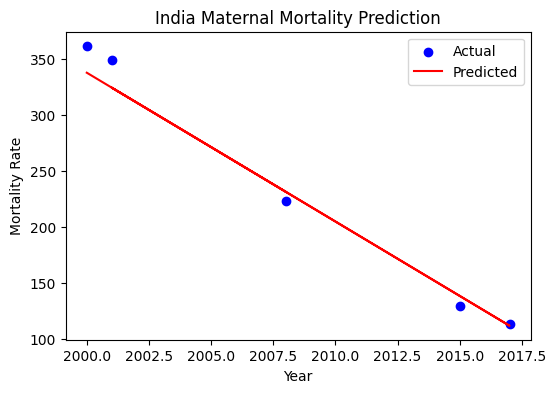

Evaluation for Germany:
MAE: 0.43179740580605996
RMSE: 0.44190330607242145
R² Score: 0.8122321808483306



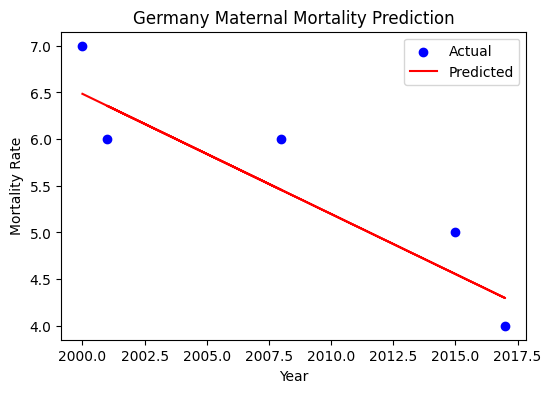

In [14]:
# Train the Linear Regression model and evaluate how well it predicts maternal mortality
# Show graph comparing the actual and predicted values for each country
def train_and_evaluate(X_train, X_test, y_train, y_test, country):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Evaluation for {country}:")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R² Score:", r2_score(y_test, y_pred))
    print()

# Plotting the actual vs predicted values
    plt.figure(figsize=(6, 4))
    plt.scatter(X_test, y_test, color='blue', label='Actual')
    plt.plot(X_test, y_pred, color='red', label='Predicted')
    plt.title(f'{country} Maternal Mortality Prediction')
    plt.xlabel('Year')
    plt.ylabel('Mortality Rate')
    plt.legend()
    plt.show()

# Running the function for each country
train_and_evaluate(X_train_K, X_test_K, y_train_K, y_test_K, 'Kenya')
train_and_evaluate(X_train_I, X_test_I, y_train_I, y_test_I, 'India')
train_and_evaluate(X_train_G, X_test_G, y_train_G, y_test_G, 'Germany')


In [15]:
# Importing extra machine learning models to try and compare with Linear Regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [16]:
# Models and Functions to train and evaluate
def compare_models(X_train, X_test, y_train, y_test):
    models = {
        'Linear Regression': LinearRegression(),
        'Decision Tree': DecisionTreeRegressor(random_state=42),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
    }

    results = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        results[name] = {
            'MAE': mean_absolute_error(y_test, y_pred),
            'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
            'R2': r2_score(y_test, y_pred)
        }

        # Plotting
        plt.figure(figsize=(6, 4))
        plt.scatter(X_test, y_test, color='blue', label='Actual')
        plt.plot(X_test, y_pred, color='red', label='Predicted')
        plt.title(f'{name} - Maternal Mortality Prediction')
        plt.xlabel('Year')
        plt.ylabel('Mortality Rate')
        plt.legend()
        plt.show()

    return pd.DataFrame(results).T


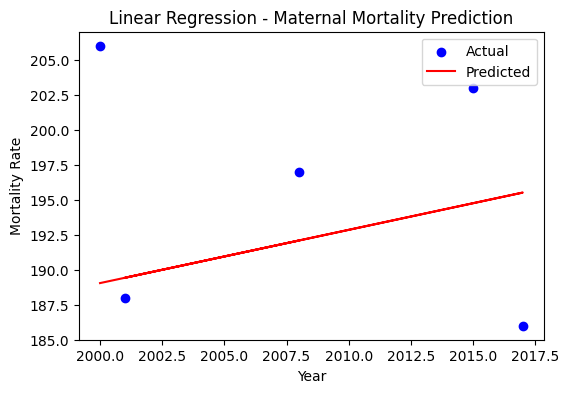

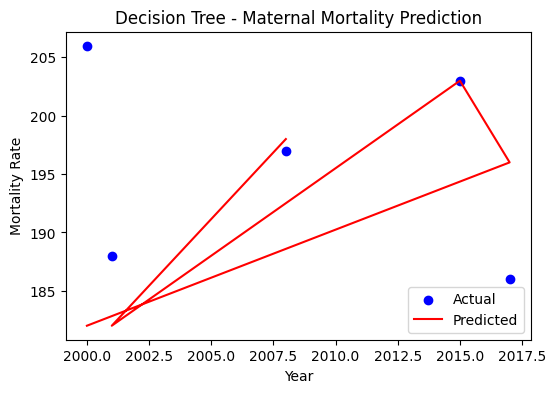

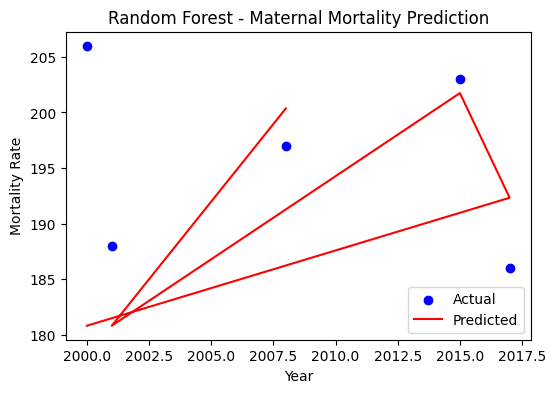

Model Comparison for Kenya:


,MAE,RMSE,R2
Linear Regression,8.210649,9.717522,-0.503666
Decision Tree,8.200000,11.941524,-1.270701
Random Forest,8.662000,12.153443,-1.352009


In [17]:
# Results and Print
results_kenya = compare_models(X_train_K, X_test_K, y_train_K, y_test_K)
print("Model Comparison for Kenya:")
results_kenya


In [18]:
# Importing extra machine learning models to try and compare with Linear Regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [19]:
# Models and Functions to train and evaluate
def compare_models(X_train, X_test, y_train, y_test):
    models = {
        'Linear Regression': LinearRegression(),
        'Decision Tree': DecisionTreeRegressor(random_state=42),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
    }

    results = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        results[name] = {
            'MAE': mean_absolute_error(y_test, y_pred),
            'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
            'R2': r2_score(y_test, y_pred)
        }

        # Plotting
        plt.figure(figsize=(6, 4))
        plt.scatter(X_test, y_test, color='blue', label='Actual')
        plt.plot(X_test, y_pred, color='red', label='Predicted')
        plt.title(f'{name} - Maternal Mortality Prediction')
        plt.xlabel('Year')
        plt.ylabel('Mortality Rate')
        plt.legend()
        plt.show()

    return pd.DataFrame(results).T


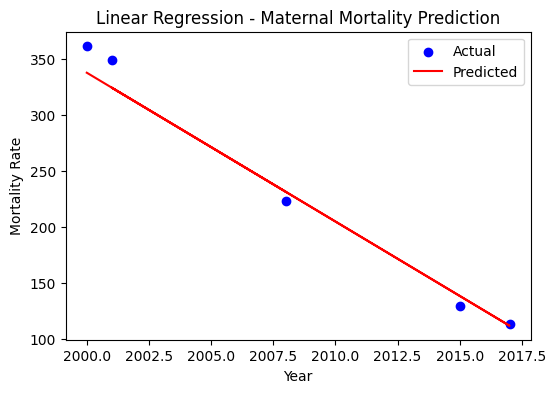

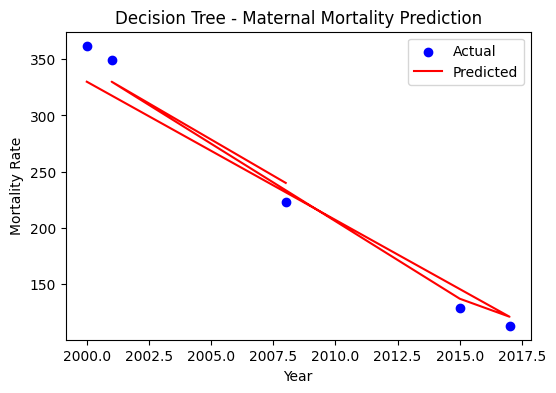

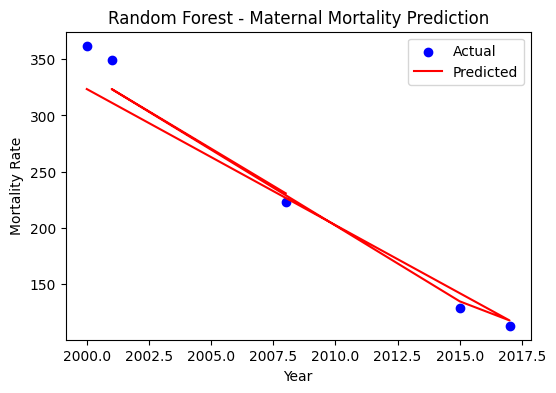

Model Comparison for India:


,MAE,RMSE,R2
Linear Regression,13.512613,16.345918,0.975881
Decision Tree,16.800000,18.984204,0.967466
Random Forest,16.438000,21.216876,0.959364


In [20]:
# Results and Print
results_india = compare_models(X_train_I, X_test_I, y_train_I, y_test_I)
print("Model Comparison for India:")
results_india


In [21]:
# Importing extra machine learning models to try and compare with Linear Regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [22]:
# Models and Functions to train and evaluate
def compare_models(X_train, X_test, y_train, y_test):
    models = {
        'Linear Regression': LinearRegression(),
        'Decision Tree': DecisionTreeRegressor(random_state=42),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
    }

    results = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        results[name] = {
            'MAE': mean_absolute_error(y_test, y_pred),
            'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
            'R2': r2_score(y_test, y_pred)
        }

        # Plotting
        plt.figure(figsize=(6, 4))
        plt.scatter(X_test, y_test, color='blue', label='Actual')
        plt.plot(X_test, y_pred, color='red', label='Predicted')
        plt.title(f'{name} - Maternal Mortality Prediction')
        plt.xlabel('Year')
        plt.ylabel('Mortality Rate')
        plt.legend()
        plt.show()

    return pd.DataFrame(results).T


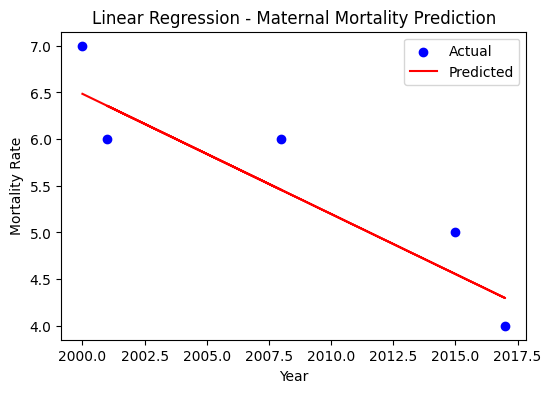

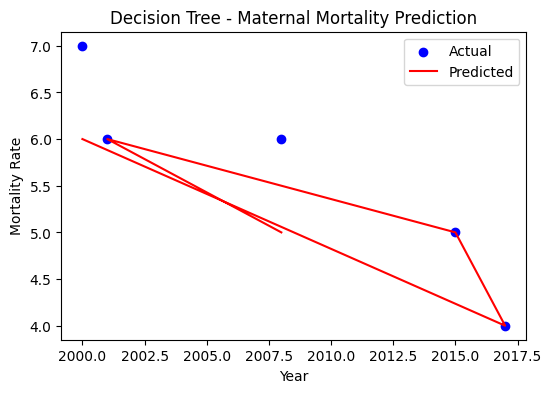

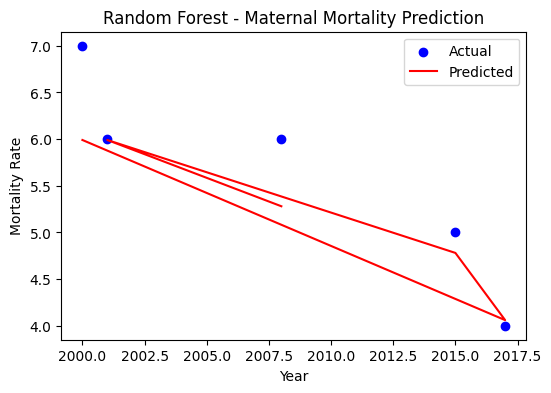

Model Comparison for Germany:


,MAE,RMSE,R2
Linear Regression,0.431797,0.441903,0.812232
Decision Tree,0.400000,0.632456,0.615385
Random Forest,0.404000,0.564021,0.694115


In [23]:
# Results and Print
results_germany = compare_models(X_train_G, X_test_G, y_train_G, y_test_G)
print("Model Comparison for Germany:")
results_germany


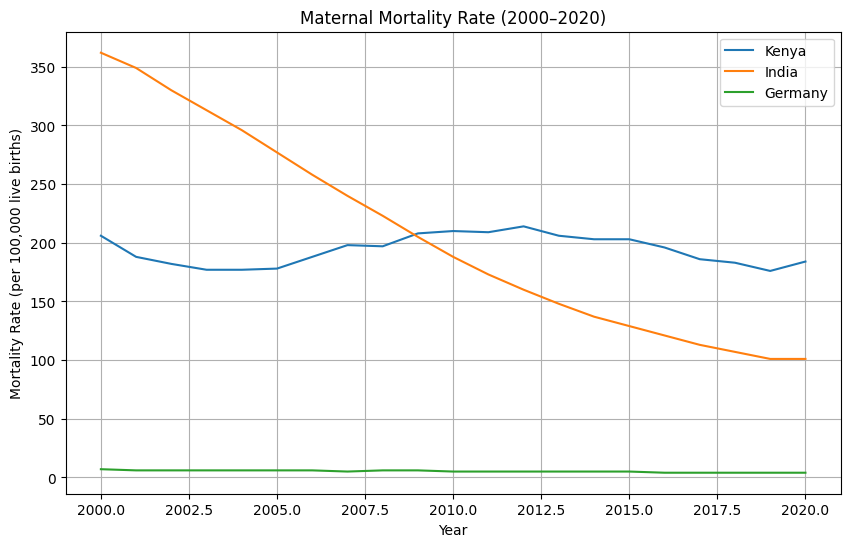

In [24]:
# Plotting the maternal mortality rates from 2000 to 2020 for Kenya, India and Germany.
plt.figure(figsize=(10, 6))
for country in ['Kenya', 'India', 'Germany']:
    plt.plot(df['Year'], df[country], label=country)

plt.title("Maternal Mortality Rate (2000–2020)")
plt.xlabel("Year")
plt.ylabel("Mortality Rate (per 100,000 live births)")
plt.legend()
plt.grid(True)
plt.show()


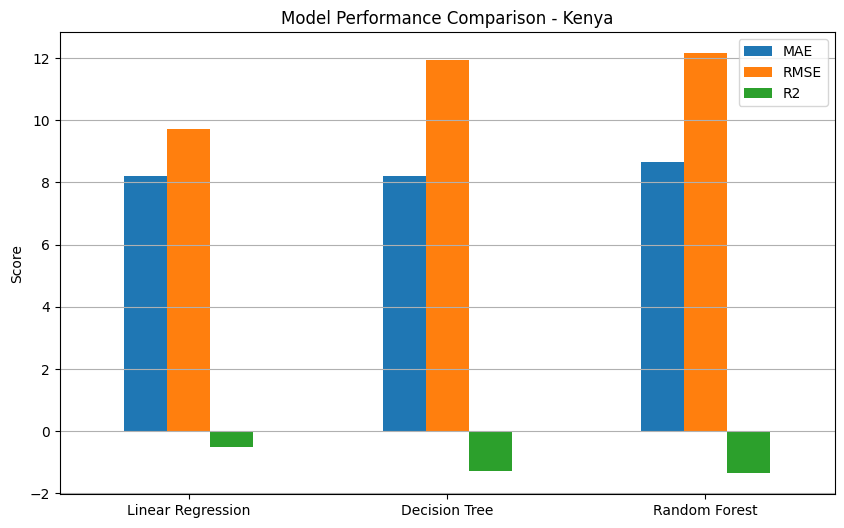

In [25]:
# Create a bar chart to compare how different models performed on Kenya's data.
results_kenya.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison - Kenya')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.grid(True, axis='y')
plt.show()


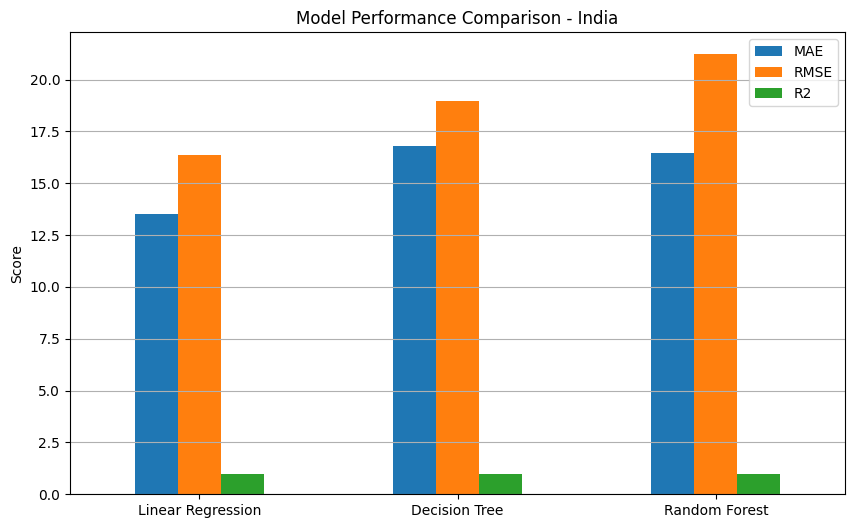

In [26]:
# Create a bar chart to compare how different models performed on India's data.
results_india.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison - India')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.grid(True, axis='y')
plt.show()


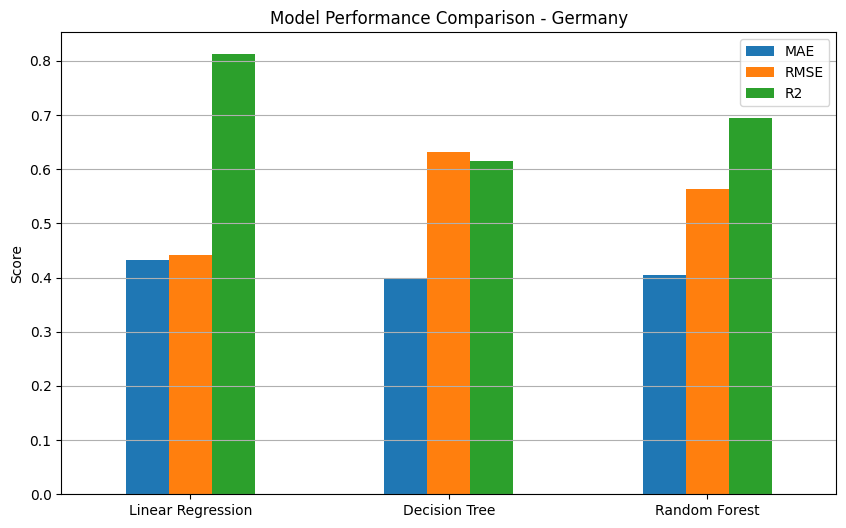

In [27]:
# Create a bar chart to compare how different models performed on Germany's data.
results_germany.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison - Germany')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.grid(True, axis='y')
plt.show()
